# V10

Berechnen Sie die Koeffizienten des oben abgebildeten Interpolationspolynoms
\( p(x) = a_4 \cdot x^4 + a_3 \cdot x^3 + a_2 \cdot x^2 + a_1 \cdot x + a_0 \)
zu den fünf Punkten \((0,1), (0.5,1), (1,0), (1.5,0), (2,3)\).
Formulieren Sie dazu die Interpolationsaufgabe als lineares Gleichungssystem für die unbekannten Koeffizienten.
Reproduzieren Sie den obigen Graphen in Python.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([1, 1, 0, 0, 3])

# Interpolationspolynom
def p(x, a):
    return a[0] + a[1] * x + a[2] * x ** 2 + a[3] * x ** 3 + a[4] * x ** 4
# Koeffizienten
a = np.zeros(5)
# Koeffizientenmatrix
A = np.zeros((5, 5))
# Interpolationsmatrix
for i in range(5):
    for j in range(5):
        A[i, j] = x[i] ** j
# Interpolationsvektor
b = np.zeros(5)
for i in range(5):
    b[i] = y[i]
# LGS lösen
a = np.linalg.solve(A, b)

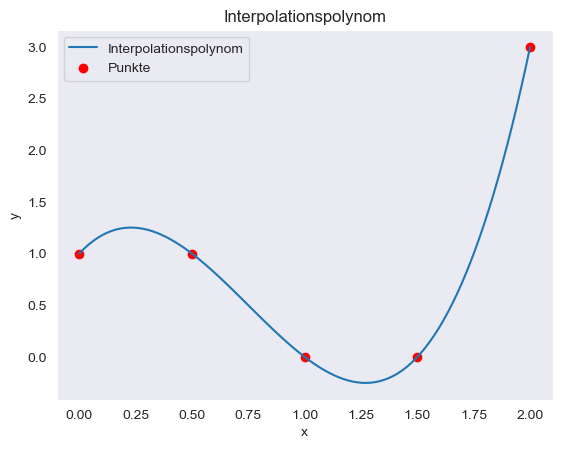

In [3]:
# plotten
x_plot = np.linspace(0, 2, 100)
y_plot = p(x_plot, a)
plt.plot(x_plot, y_plot, label='Interpolationspolynom')
plt.scatter(x, y, color='red', label='Punkte')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolationspolynom')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# print function with coefficients
def print_function(a):
    print(f"p(x) = {a[0]} + {a[1]} * x + {a[2]} * x^2 + {a[3]} * x^3 + {a[4]} * x^4")
print_function(a)

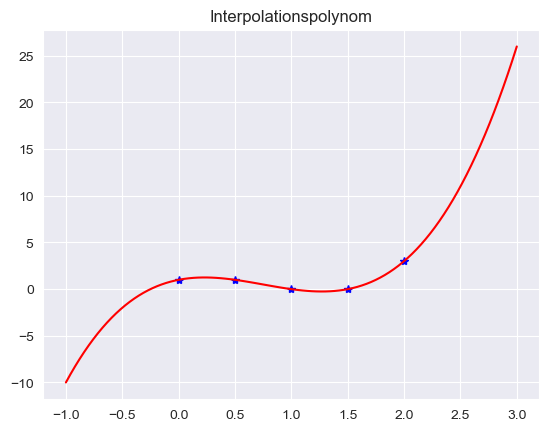

p(x) = -6.661338147750939e-16 + 2.6666666666666696 * x + -6.0000000000000036 * x^2 + 2.3333333333333344 * x^3 + 1.0 * x^4


In [13]:
# Interpolationsdaten
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([1, 1, 0, 0, 3])

# Berechnung der Koeffizienten des Interpolationspolynoms
V = np.vander(x)
p = np.linalg.solve( V, y )
# Vergleichsplot
xx = np.linspace( -1, 3, 100 )
yy = np.polyval( p, xx )
plt.plot( x, y, 'b*', xx, yy, 'r' )
plt.title( 'Interpolationspolynom' )
plt.show()

# print function with coefficients
def print_function(a):
    print(f"p(x) = {a[0]} + {a[1]} * x + {a[2]} * x^2 + {a[3]} * x^3 + {a[4]} * x^4")
print_function(p)